<a href="https://colab.research.google.com/github/sandeep92134/PYTHON-Data-Cleaning/blob/master/Chapter%205/Exersize%203.%20Using%20grouped%20boxplots%20to%20uncover%20unexpected%20values%20in%20a%20particular%20group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nls97 = pd.read_csv("https://raw.githubusercontent.com/sandeep92134/PYTHON-Data-Cleaning/master/Chapter%205/datasets/nls97.csv")
nls97.set_index("personid", inplace=True)
covidtotals = pd.read_csv("https://raw.githubusercontent.com/sandeep92134/PYTHON-Data-Cleaning/master/Chapter%205/datasets/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

In [2]:
def gettots(x):
  out = {}
  out['min'] = x.min()
  out['qr1'] = x.quantile(0.25)
  out['med'] = x.median()
  out['qr3'] = x.quantile(0.75)
  out['max'] = x.max()
  out['count'] = x.count()
  return pd.Series(out)


In [3]:
nls97.groupby(['highestdegree'])['weeksworked17'].\
 apply(gettots).unstack()

,min,qr1,med,qr3,max,count
highestdegree,,,,,,
0. None,0.0,0.0,40.0,52.0,52.0,510.0
1. GED,0.0,8.0,47.0,52.0,52.0,848.0
2. High School,0.0,31.0,49.0,52.0,52.0,2665.0
3. Associates,0.0,42.0,49.0,52.0,52.0,593.0
4. Bachelors,0.0,45.0,50.0,52.0,52.0,1342.0
5. Masters,0.0,46.0,50.0,52.0,52.0,538.0
6. PhD,0.0,46.5,50.0,52.0,52.0,51.0
7. Professional,0.0,47.0,50.0,52.0,52.0,97.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


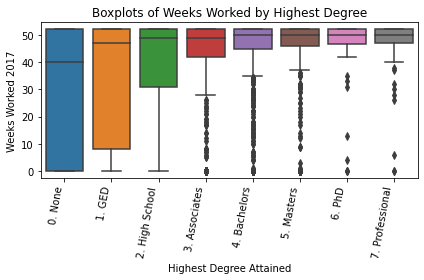

In [4]:
myplt = sns.boxplot('highestdegree','weeksworked17', data=nls97,
  order=sorted(nls97.highestdegree.dropna().unique()))
myplt.set_title("Boxplots of Weeks Worked by Highest Degree")
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=80, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [5]:
covidtotals.groupby(['region'])['total_cases_pm'].\
   apply(gettots).unstack()


,min,qr1,med,qr3,max,count
region,,,,,,
Caribbean,95.035,251.51850,339.0095,1726.15975,4435.327,22.0
Central Africa,14.696,71.09900,367.5180,1538.36600,3317.196,11.0
Central America,93.053,924.54750,1447.8430,2190.56500,10274.481,7.0
Central Asia,373.866,918.89625,1974.4910,2906.75950,10593.831,6.0
East Africa,8.521,65.41800,190.1960,268.91700,5015.172,13.0
East Asia,2.611,15.98500,64.6315,269.34525,7825.695,16.0
Eastern Europe,346.726,882.72775,1189.8350,2317.46025,6854.143,22.0
North Africa,105.342,202.14600,421.0720,426.71700,793.067,5.0
North America,2290.093,2566.99750,2843.9020,6327.77900,9811.656,3.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

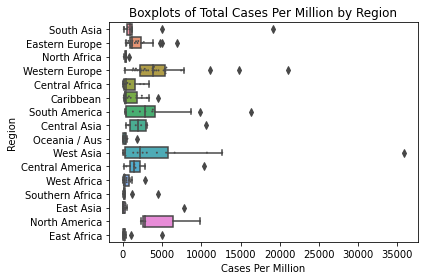

In [6]:
sns.boxplot('total_cases_pm', 'region', data=covidtotals)
sns.swarmplot(y="region", x="total_cases_pm", data=covidtotals, size=2, color=".3", linewidth=0)
plt.title("Boxplots of Total Cases Per Million by Region")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

In [7]:
# show the most extreme value for covid totals
covidtotals.loc[covidtotals.total_cases_pm>=14000,\
  ['location','total_cases_pm']]

,location,total_cases_pm
iso_code,,
BHR,Bahrain,19082.231
CHL,Chile,16322.745
QAT,Qatar,35795.159
SMR,San Marino,21038.364
VAT,Vatican,14833.127


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

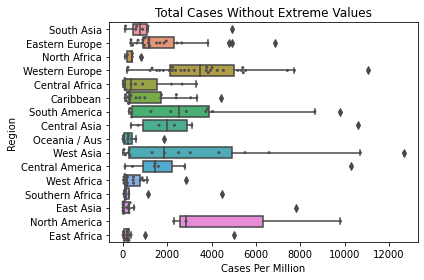

In [8]:
# do the same boxplots without the one extreme value in West Asia
sns.boxplot('total_cases_pm', 'region', data=covidtotals.loc[covidtotals.total_cases_pm<14000])
sns.swarmplot(y="region", x="total_cases_pm", data=covidtotals.loc[covidtotals.total_cases_pm<14000], size=3, color=".3", linewidth=0)
plt.title("Total Cases Without Extreme Values")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

In [9]:
nls97.groupby(['highestdegree'])['weeksworked17'].apply(gettots).unstack() 

,min,qr1,med,qr3,max,count
highestdegree,,,,,,
0. None,0.0,0.0,40.0,52.0,52.0,510.0
1. GED,0.0,8.0,47.0,52.0,52.0,848.0
2. High School,0.0,31.0,49.0,52.0,52.0,2665.0
3. Associates,0.0,42.0,49.0,52.0,52.0,593.0
4. Bachelors,0.0,45.0,50.0,52.0,52.0,1342.0
5. Masters,0.0,46.0,50.0,52.0,52.0,538.0
6. PhD,0.0,46.5,50.0,52.0,52.0,51.0
7. Professional,0.0,47.0,50.0,52.0,52.0,97.0
